In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
clients = pd.read_csv('./data/clients.csv', index_col='client_id')

In [3]:
clients.head()

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
000048b7a6,2018-12-15 13:33:11,NaN,68,F
000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U


In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400162 entries, 000012768d to fffff6ce77
Data columns (total 4 columns):
first_issue_date     400162 non-null object
first_redeem_date    364693 non-null object
age                  400162 non-null int64
gender               400162 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [5]:
prods = pd.read_csv('./data/products.csv', index_col='product_id')

In [6]:
prods.head()

,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
product_id,,,,,,,,,,
0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0


In [7]:
prods.nunique()

level_1                3
level_2               42
level_3              201
level_4              790
segment_id           116
brand_id            4296
vendor_id           3193
netto                780
is_own_trademark       2
is_alcohol             2
dtype: int64

In [8]:
orders = pd.read_csv('./data/purchases.csv', nrows = 1000000, parse_dates=['transaction_datetime'])

In [9]:
orders.nunique()

client_id                    8872
transaction_id             175165
transaction_datetime       172282
regular_points_received       860
express_points_received        11
regular_points_spent          458
express_points_spent           41
purchase_sum                48403
store_id                    10649
product_id                  27461
product_quantity               57
trn_sum_from_iss             1186
trn_sum_from_red              593
dtype: int64

In [10]:
orders.shape

(1000000, 13)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
client_id                  1000000 non-null object
transaction_id             1000000 non-null object
transaction_datetime       1000000 non-null datetime64[ns]
regular_points_received    1000000 non-null float64
express_points_received    1000000 non-null float64
regular_points_spent       1000000 non-null float64
express_points_spent       1000000 non-null float64
purchase_sum               1000000 non-null float64
store_id                   1000000 non-null object
product_id                 1000000 non-null object
product_quantity           1000000 non-null float64
trn_sum_from_iss           1000000 non-null float64
trn_sum_from_red           68867 non-null float64
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 99.2+ MB


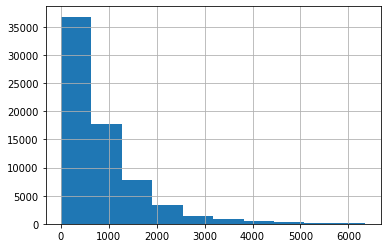

In [12]:
(orders.purchase_sum - orders.trn_sum_from_red).hist()

# Start Dataset

Features explanations:
* client_id, идентификатор клиента
* transaction_id, идентификатор транзакции
* transaction_datetime, время транзакции
* regular_points_received, регулярные баллы полученные
* express_points_received, срочные баллы полученные
* regular_points_spent, регулярные баллы потраченные
* express_points_spent, срочные баллы потраченные
* purchase_sum, цена без учета скидок (by transaction)
* store_id, идентификатор магазина
* product_id, идентификатор продукта
* product_quantity, количество продуктов
* trn_sum_from_iss, реально оплаченное деньгами (by product)
* trn_sum_from_red, конечная цена (деньги + баллы) (by product)

In [13]:
orders.transaction_datetime.dt.dayofweek.value_counts()

4    157287
5    153427
0    146477
3    143170
6    141570
2    132591
1    125478
Name: transaction_datetime, dtype: int64

In [14]:
orders.columns

Index(['client_id', 'transaction_id', 'transaction_datetime',
       'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'purchase_sum',
       'store_id', 'product_id', 'product_quantity', 'trn_sum_from_iss',
       'trn_sum_from_red'],
      dtype='object')

In [47]:
orders.nunique()

client_id                    8872
transaction_id             175165
transaction_datetime       172282
regular_points_received       860
express_points_received        11
regular_points_spent          458
express_points_spent           41
purchase_sum                48403
store_id                    10649
product_id                  27461
product_quantity               57
trn_sum_from_iss             1186
trn_sum_from_red              593
dtype: int64

## Order Feature

In [50]:
orders_headers = orders[['client_id', 'transaction_id', 'transaction_datetime',
       'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'purchase_sum',
       'store_id']].drop_duplicates().set_index('transaction_id')

In [51]:
orders_headers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175165 entries, 7e3e2e3984 to 1dee4b51e2
Data columns (total 8 columns):
client_id                  175165 non-null object
transaction_datetime       175165 non-null datetime64[ns]
regular_points_received    175165 non-null float64
express_points_received    175165 non-null float64
regular_points_spent       175165 non-null float64
express_points_spent       175165 non-null float64
purchase_sum               175165 non-null float64
store_id                   175165 non-null object
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 12.0+ MB


In [17]:
orders_headers.nunique()

client_id                    8872
transaction_datetime       172282
regular_points_received       860
express_points_received        11
regular_points_spent          458
express_points_spent           41
purchase_sum                48403
store_id                    10649
dtype: int64

In [18]:
orders_headers['weekday'] = orders_headers.transaction_datetime.dt.dayofweek

In [19]:
orders_headers['is_weekend'] = orders_headers.weekday > 4

In [20]:
orders_headers['is_workday'] = orders_headers.weekday <=4

In [36]:
orders_headers.sort_values(['client_id', 'transaction_datetime'], inplace=True)

In [22]:
orders_headers['intervals'] = orders_headers.groupby('client_id').diff().transaction_datetime / np.timedelta64(1, 'D')

In [23]:
orders_headers = orders_headers.join(orders.groupby('transaction_id').sum()['product_quantity'], how='left').join(orders.groupby('transaction_id').count()['product_id'], how='left') 

In [24]:
orders_headers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175165 entries, 7e3e2e3984 to 1dee4b51e2
Data columns (total 14 columns):
client_id                  175165 non-null object
transaction_datetime       175165 non-null datetime64[ns]
regular_points_received    175165 non-null float64
express_points_received    175165 non-null float64
regular_points_spent       175165 non-null float64
express_points_spent       175165 non-null float64
purchase_sum               175165 non-null float64
store_id                   175165 non-null object
weekday                    175165 non-null int64
is_weekend                 175165 non-null bool
is_workday                 175165 non-null bool
intervals                  166293 non-null float64
product_quantity           175165 non-null float64
product_id                 175165 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 22.7+ MB


In [46]:
#orders sorted by client_id, datetime asceinding
orders_headers[['purchase_sum', '']].diff()

transaction_id
7e3e2e3984       NaN
c1ca85d462   -433.00
6a0e96d0bc    229.00
b34f23306e   -384.00
12b218b054   -178.00
               ...  
faed17b671   -290.37
1f83c45c11    299.92
dc9561875a    -58.90
c5e1ed7ff7   -150.02
1dee4b51e2    143.00
Name: purchase_sum, Length: 175165, dtype: float64

In [ ]:
#Difference between 

### Order Product Features

In [25]:
orders_product = orders.set_index('product_id').join(prods, how='outer').reset_index()

In [26]:
orders_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015577 entries, 0 to 1015576
Data columns (total 23 columns):
product_id                 1015577 non-null object
client_id                  1000000 non-null object
transaction_id             1000000 non-null object
transaction_datetime       1000000 non-null datetime64[ns]
regular_points_received    1000000 non-null float64
express_points_received    1000000 non-null float64
regular_points_spent       1000000 non-null float64
express_points_spent       1000000 non-null float64
purchase_sum               1000000 non-null float64
store_id                   1000000 non-null object
product_quantity           1000000 non-null float64
trn_sum_from_iss           1000000 non-null float64
trn_sum_from_red           68867 non-null float64
level_1                    1015424 non-null object
level_2                    1015424 non-null object
level_3                    1015424 non-null object
level_4                    1015424 non-null object
segmen

In [27]:
orders_product.head()

,product_id,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,...,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.40,0,0
1,0003870676,050c2b0f72,4b260ef875,2018-12-24 13:29:22,14.0,0.0,0.0,0.0,1403.58,70dab5f5c2,...,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.68,0,0
2,0003870676,0540f7beb2,2911db4611,2019-03-11 08:00:15,7.8,0.0,0.0,0.0,680.00,9ad95350f5,...,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.68,0,0
3,0003870676,0587a63359,946769d0ea,2019-02-19 15:41:22,12.4,0.0,0.0,0.0,1240.85,dad1b14a82,...,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.68,0,0
4,0003ceaf69,017db1bdd4,1c1da7fff4,2019-02-07 09:20:46,5.9,0.0,0.0,0.0,593.75,10aaa6b3ea,...,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.50,0,0


## Final Features by Client

In [28]:
client_means = orders_headers.groupby('client_id').mean()

In [29]:
client_max = orders_headers.groupby('client_id').max()

In [30]:
client_features = clients.join(
                    client_means, how='left').join(
                    client_max, how='left', lsuffix='_mean', rsuffix='_max')

In [31]:
# client_features.mean()
# Очень долго считается

In [32]:
client_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400162 entries, 000012768d to fffff6ce77
Data columns (total 28 columns):
first_issue_date                400162 non-null object
first_redeem_date               364693 non-null object
age                             400162 non-null int64
gender                          400162 non-null object
regular_points_received_mean    8872 non-null float64
express_points_received_mean    8872 non-null float64
regular_points_spent_mean       8872 non-null float64
express_points_spent_mean       8872 non-null float64
purchase_sum_mean               8872 non-null float64
weekday_mean                    8872 non-null float64
is_weekend_mean                 8872 non-null float64
is_workday_mean                 8872 non-null float64
intervals_mean                  8712 non-null float64
product_quantity_mean           8872 non-null float64
product_id_mean                 8872 non-null float64
transaction_datetime            8872 non-null datetime64[ns]
regular

# Modeling